In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [5]:
df.sample(5)

,Age,Fare,Family,Survived
201,NaN,69.550,10,0
241,NaN,15.500,1,1
199,24.0,13.000,0,0
542,11.0,31.275,6,0
480,9.0,46.900,7,0


In [13]:
from sklearn.model_selection import train_test_split
df.isnull().mean()*100
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

# Imputation using pandas 

## For age col

In [17]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

 Adding imputed columns in df

In [18]:
X_train['Imputed_Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Imputed_Age_median']=X_train['Age'].fillna(median_age)
X_train['Imputed_Fare_mean']=X_train['Fare'].fillna(mean_age)
X_train['Imputed_Fare_median']=X_train['Fare'].fillna(median_age)

X_train.sample(5)

### Now we will check what effects imputation has made on outliers,distribution,covarianace with other cols

1] Checking change in variance

In [22]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Imputed_Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Imputed_Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Imputed_Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Imputed_Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2324.9576136149317
Fare Variance after mean imputation:  2324.623996772905


2] Checking changes in distribution

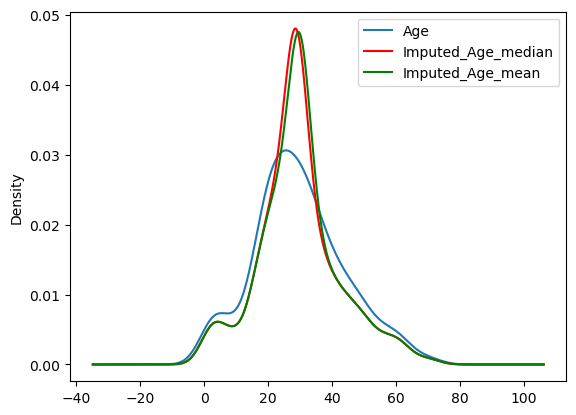

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Imputed_Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Imputed_Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

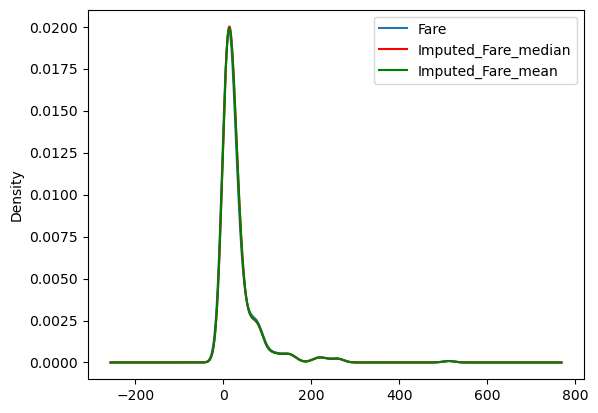

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)
X_train['Imputed_Fare_median'].plot(kind='kde',ax=ax,color='red')
X_train['Imputed_Fare_mean'].plot(kind='kde',ax=ax,color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

3] Checking covariance

In [32]:
X_train.cov()

,Age,Fare,Family,Imputed_Age_mean,Imputed_Age_median,Imputed_Fare_mean,Imputed_Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.383530,66.280487
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.399278,16.404484
Imputed_Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.565299,52.483705
Imputed_Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,54.793876,54.710043
Imputed_Fare_mean,66.383530,2448.197914,16.399278,52.565299,54.793876,2324.623997,2324.765012
Imputed_Fare_median,66.280487,2448.197914,16.404484,52.483705,54.710043,2324.765012,2324.957614


4] Checking correlation

In [33]:
X_train.corr()

,Age,Fare,Family,Imputed_Age_mean,Imputed_Age_median,Imputed_Fare_mean,Imputed_Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089754,0.089604
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205660,0.205710
Imputed_Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.085707,0.085568
Imputed_Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089292,0.089149
Imputed_Fare_mean,0.089754,1.000000,0.205660,0.085707,0.089292,1.000000,0.999989
Imputed_Fare_median,0.089604,1.000000,0.205710,0.085568,0.089149,0.999989,1.000000


5] Outliers

<Axes: >

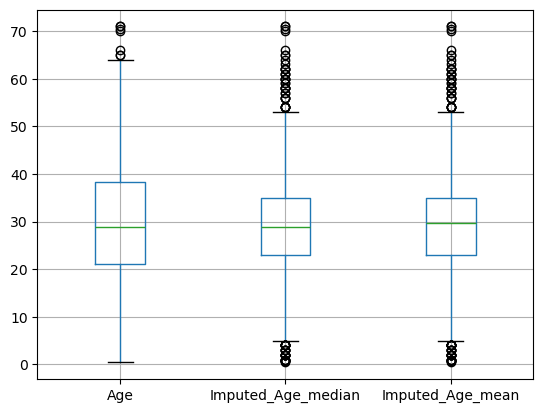

In [36]:
X_train[['Age', 'Imputed_Age_median', 'Imputed_Age_mean']].boxplot()

<Axes: >

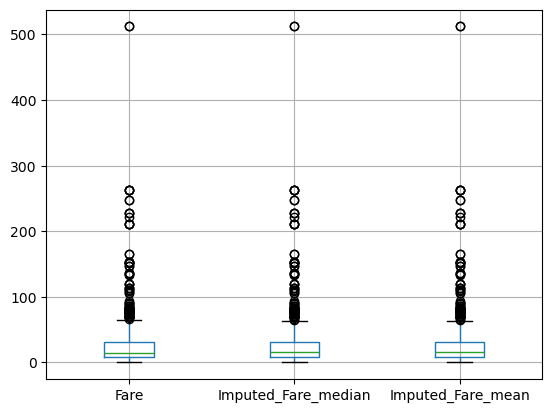

In [37]:
X_train[['Fare', 'Imputed_Fare_median', 'Imputed_Fare_mean']].boxplot()

# Using Sklearn

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [44]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [45]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [46]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])